<a href="https://colab.research.google.com/github/godide/godide/blob/main/2509788_COMS7050A_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# OpenCV: computer vision library 
import cv2
# NumPy: n-dimensional arrays and math 
import numpy as np
# SciPy: scientific computing and stats 
import scipy.stats
# scikit-image: image processing and color conversion 
import skimage
# ImageIO: easy image/video reading/writing 
import imageio
# mpmath: arbitrary precision floating point operations 
import mpmath
# matplotlib: plotting 
import matplotlib.pyplot as plt
# seaborn: matplotlib wrapper 
import seaborn as sns
# Python Image Library: alternative image processing 
import PIL


## Import Images ##


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#!pwd

In [72]:
!unzip -q "/content/drive/My Drive/puzzle-images.zip"

replace image-35.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace image-83.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace image-110.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## Read and Display images ##


Text(0.5, 1.0, 'Mask110')

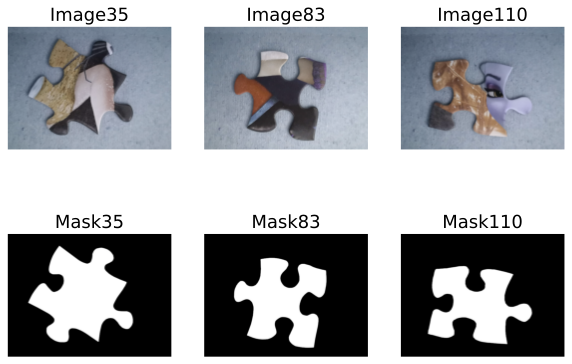

In [73]:
# code for displaying multiple images in one figure

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 3

# reading images
Image35 = cv2.imread('image-35.jpg')
Image83 = cv2.imread('image-83.jpg')
Image110 = cv2.imread('image-110.jpg')
Mask35 = cv2.imread('mask-35.png')
Mask83 = cv2.imread('mask-83.png')
Mask110 = cv2.imread('mask-110.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image35)
plt.axis('off')
plt.title("Image35")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image83)
plt.axis('off')
plt.title("Image83")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image110)
plt.axis('off')
plt.title("Image110")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Mask35)
plt.axis('off')
plt.title("Mask35")


# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Mask83)
plt.axis('off')
plt.title("Mask83")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Mask110)
plt.axis('off')
plt.title("Mask110")

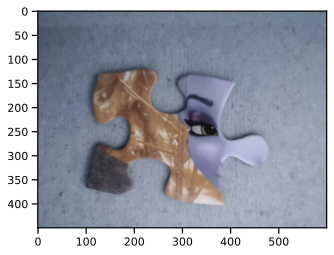

In [74]:
 plt.imshow(np.moveaxis(Image110, 1, 1))

In [75]:
im = Image110/255.0
print(im.shape) 


(450, 600, 3)


## RGB to Grayscale ##

Text(0.5, 1.0, 'Grayscale - Image-83')

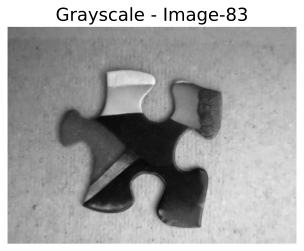

In [76]:
from skimage.color import rgb2gray
# showing image
grayscale83 = rgb2gray(Image83)
plt.imshow(grayscale83,cmap='gray')
plt.axis('off')
plt.title("Grayscale - Image-83")


HSV

Text(0.5, 1.0, 'HSV - Image83')

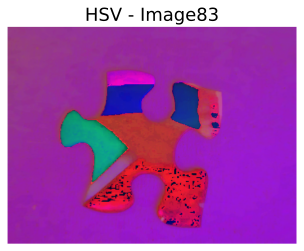

In [78]:
from skimage.color import rgb2hsv

hsv83 = rgb2hsv(Image83)
plt.imshow(hsv83)
plt.axis('off')
plt.title("HSV - Image83")

## 4 Descriptive Statistics ##


In [79]:
# To get height and width of an image - PIL library is used.
image = PIL.Image.open("image-83.jpg")

# image.size return a tuple containing the width and height in pixels.
width, height = image.size

### 4.1 What is the width of the image? ###

In [80]:
print("Width of image-83 is: ", width)

Width of image-83 is:  600


### 4.2 What is the height of the image? ###


In [81]:
print("Height of image-83 : ", height)

Height of image-83 :  450


### 4.3 How many pixels are in the image in total? ###

In [82]:
print ( "Total pixels on image-83 :", width * height)

Total pixels on image-83 : 270000


### 4.4 How many black pixels are there in the mask? ###

In [83]:
# reading the image data from desired directory

# counting the number of pixels
#number_of_white_pix = np.sum(Image35 == 255)
number_of_black_pix = np.sum(Mask83 == 0)
  
#print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels on Mask83 :', number_of_black_pix)

Number of black pixels on Mask83 : 627189


### 4.5 How many white pixels are there in the mask? ###


In [84]:
# counting the number of pixels
number_of_white_pix = np.sum(Mask83 == 255)

print('Number of white pixels on Mask83 :', number_of_white_pix)

Number of white pixels on Mask83 : 176847


### Using the grayscale version of the image... ###


In [85]:
#Convert Image-110.png to Grayscale
gray110 = cv2.cvtColor(Image110, cv2.COLOR_BGR2GRAY)

# or PIL
#gray110 = Image.open('image-110.png').convert('L')

### 4.6 What is the minimum pixel value in the image ###

In [86]:
#Find the smallest pix
smallest = gray110.min(axis=(0, 1))
print ("Minimum pixel for Image110 :", smallest)

Minimum pixel for Image110 : 14


### 4.7 What is the maximum pixel value in the image ###

In [87]:
#Find the largest pix
largest = gray110.max(axis=(0, 1))
print ("Maximum pixel for Image110 :", largest)



Maximum pixel for Image110 : 218


### 4.8 ###

In [88]:
puzzle_min = np.round(np.min(gray110[smallest]), 2)
puzzle_max = np.round(np.max(gray110), 2)
print ("min pixel value" , puzzle_min, " and max pixel value ", puzzle_max)


min pixel value 88  and max pixel value  218


### 4.9 ###

In [89]:
# Convert the mask to grayscale
grayMask110 = cv2.cvtColor(Mask110, cv2.COLOR_BGR2GRAY)

In [90]:
#Find mask largest pixel
bg_pix = grayMask110.max(axis=(0, 1))

In [91]:
bg_min = np.round(np.min(grayMask110[bg_pix]), 2)
bg_max = np.round(np.max(bg_pix), 2)
print ("Mask110 as background - min pixel value" , bg_min, " and max pixel value ", bg_max)

Mask110 as background - min pixel value 0  and max pixel value  255


### 4.10 What is the mean pixel intensity in the image ###

In [92]:
#Find the largest pix
gray110_mean = gray110.mean()
print ("Mean for Image110 :", gray110_mean)

Mean for Image110 : 137.76364444444445


### 4.11 ###

In [93]:
#function used to calculate brightness

def brightness( im_file ):
   im = Image.open(im_file).convert('L')
   stat = ImageStat.Stat(im)
   return stat.mean[0]

In [94]:
#Display the image brightnes details
#brightness("mask-110.png")

### 4.12 ###

### 4.13 ###

### 4.14 ###

### Using the seaborn library... ###

In [95]:
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# Set JB's favorite Seaborn settings
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

import skimage.io

### 4.15 ###


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

Image110 = Image.open("image-110.jpg", 'r')

#Split the image into 3 channels
r, g, b = Image110.split()

In [97]:
print ("Image mode: ", Image110.mode)

Image mode:  RGB


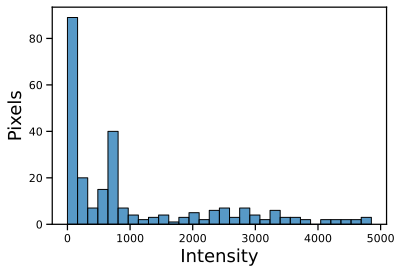

In [98]:
channel_red_110 = sns.histplot(r.histogram(), bins=30)
channel_red_110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.16 ###


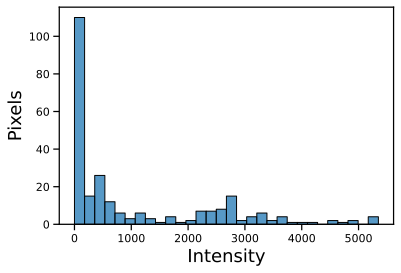

In [99]:
#hist_green = sns.distplot(Image83[:, :, 1], color = "g", norm_hist = False)
channel_green_110 = sns.histplot(g.histogram(), bins=30)
channel_green_110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.17 ###

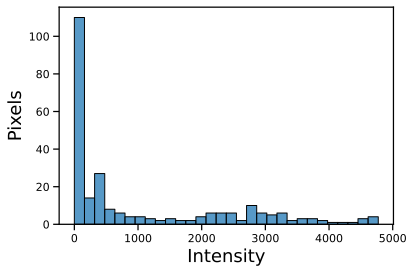

In [100]:
channel_blue_110 = sns.histplot(b.histogram(), bins=30)
channel_blue_110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.18 ###


In [101]:
from PIL import Image

mask110 = Image.open("mask-110.png")
mask110.load() # required for split()

background = Image.new("RGB", mask110.size, (255, 255, 255))
background.paste(mask110, mask=mask110.split()[3]) # is the alpha channel

background.save('bg_mask110.jpg', 'JPEG', quality=80)

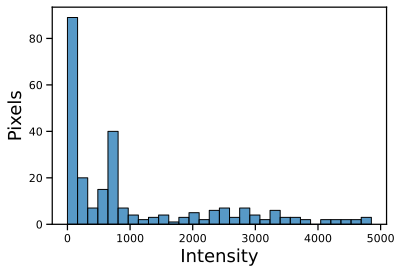

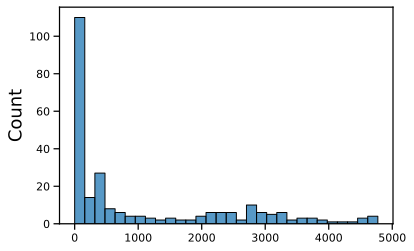

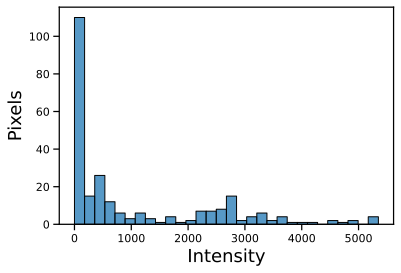

In [102]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#from PIL import Image

bg_mask110 = Image.open("bg_mask110.jpg")
bg_mask110.load() # required for split()

#Split the image into 3 channels
red, blue, green = bg_mask110.split()

channel_red_mask110 = sns.histplot(r.histogram(), bins=30)
channel_red_mask110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

channel_blue_mask110 = sns.histplot(b.histogram(), bins=30)
channel_red_mask110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

channel_green_mask110 = sns.histplot(g.histogram(), bins=30)
channel_green_mask110.set(xlabel='Intensity', ylabel='Pixels')
plt.show()

### 4.19 ###

### 4.20 ###

### 4.21 ###

### 4.22 ###

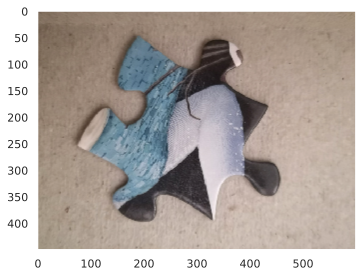

In [103]:
# Load image
im_35 = skimage.io.imread('image-35.jpg')

# Display the image
with sns.axes_style('dark'):
    skimage.io.imshow(im_35 / im_35.max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


Text(0, 0.5, 'count')

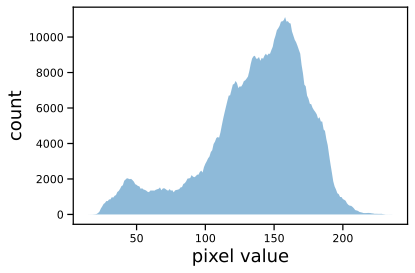

In [104]:
# Get the histogram data
hist_phase, bins_phase = skimage.exposure.histogram(im_35)

# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_phase, hist_phase, alpha=0.5)

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

### 5.2 Perform a histogram equalisation of the image  ###

In [105]:
def histeq(im,nbr_bins=256):
  """  Histogram equalization of a grayscale image. """

  # get image histogram
  imhist,bins = histogram(im.flatten(),nbr_bins, density=True)
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = 255 * cdf / cdf[-1] # normalize

  # use linear interpolation of cdf to find new pixel values
  im2 = interp(im.flatten(),bins[:-1],cdf)

  return im2.reshape(im.shape), cdf

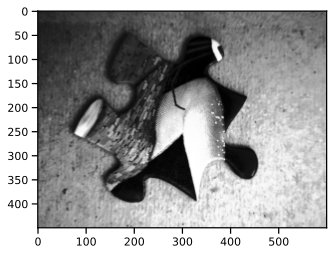

In [106]:
from PIL import Image
from numpy import *

im = array(Image.open('image-35.jpg').convert('L'), 'f')
im2,cdf = histeq(im)

plt.imshow (im2,cmap='gray')
plt.show()

# Convert an image into floating point #

In [107]:
#from PIL import Image

#f_img35 = array(Image.open('image-35.jpg').convert('L'),'f')
#print (f_img35.shape, f_img35.dtype)

# 6 Background Classifier #

## 6.1 Image Convolution ##


In [108]:
def image_filter(image, kernel):
  kernel1 = kernel / ( np.sum(kernel) if np.sum(kernel) != 0 else 1 )

  #filter the source image
  final_image = cv2.filter2D(image, -1, kernel1)

  #save the output image
  #cv2.imwrite('conv_image.jpg', final_image)


### 6.2 ###


In [109]:
import cv2
#from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('image-35.jpg', cv2.IMREAD_COLOR)#[:, :, ::-1]

# Convert image to gray scale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#
# Print error message if image is null
if image is None:
    print('Could not read image')

# Apply identity kernel
vertical_prewitt_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).astype('float32')
#vertical_prewitt_filter = np.float32(vertical_prewitt_filter) / 256.

horizontal_prewitt_filter = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]).astype('float32')
laplacian_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).astype('float32')

filtered_image = image_filter(image, vertical_prewitt_filter)

# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)

#plt.imshow (identity)
#plt.show()

In [110]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage.filters import prewitt_h,prewitt_v, laplace
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread('image-35.jpg').astype('float32')

image_red = image[:,:,0]
image_green = image[:,:,1]
image_blue = image[:,:,2]

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image_red)
edges_prewitt_horizontal.astype(np.uint8)
imsave("image35redprewitth.jpg", edges_prewitt_horizontal)

#edges_prewitt_vertical = image_filter(image_red, vertical_prewitt_filter) - #applying own custom kernel
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image_red)
imsave("image35redprewittv.jpg", edges_prewitt_vertical)


#calculating vertical edges using prewitt kernel
edges_laplacian = laplace(image_red)
imsave("image35redlapcian.jpg", edges_laplacian)


#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image_blue)
edges_prewitt_horizontal.astype(np.uint8)
imsave("image35blueprewitth.jpg", edges_prewitt_horizontal)

#edges_prewitt_vertical = image_filter(image_blue, vertical_prewitt_filter) - #applying own custom kernel
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image_blue)
imsave("image35blueprewittv.jpg", edges_prewitt_vertical)


#calculating vertical edges using prewitt kernel
edges_laplacian = laplace(image_blue)
imsave("image35bluelapcian.jpg", edges_laplacian)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image_green)
edges_prewitt_horizontal.astype(np.uint8)
imsave("image35greenprewitth.jpg", edges_prewitt_horizontal)

#edges_prewitt_vertical = image_filter(image_green, vertical_prewitt_filter) - #applying own custom kernel
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image_green)
imsave("image35greenprewittv.jpg", edges_prewitt_vertical)


#calculating vertical edges using prewitt kernel
edges_laplacian = laplace(image_green)
imsave("image35greenlapcian.jpg", edges_laplacian)




((450, 600), <matplotlib.image.AxesImage at 0x7fc296a71c50>)

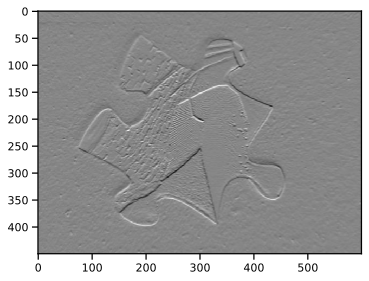

In [112]:
%matplotlib inline
from skimage.io import imread, imshow

image = imread('image35blueprewitth.jpg', as_gray=True)
image.shape, imshow(image)



In [113]:
features = np.reshape(image, (450*600))

features.shape, features

((270000,), array([135, 134, 132, ..., 134, 134, 134], dtype=uint8))